# Storytelling Through Data Visualization
---

This time we'll focus on how to use data visualization to communicate insights and tell stories.

Our dataset will give us some insights into the gender gap in STEM fields in the US.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


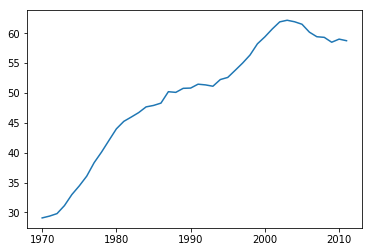

In [3]:
plt.plot(women_degrees["Year"], women_degrees["Biology"])
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the `Biology` column from `100`. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

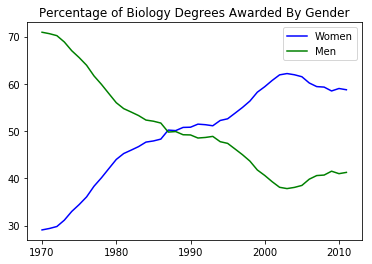

In [4]:
fig = plt.figure()
plt.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue", label = "Women")
plt.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green", label = "Men")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc = "upper right")

plt.show()

The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as [chartjunk](https://en.wikipedia.org/wiki/Chartjunk), increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the [data-ink](https://infovis-wiki.net/wiki/Data-Ink_Ratio) ratio, which is the fractional amount of the plotting area dedicated to displaying the data.

Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a pioneer of the field of data visualization. Tufte's first book, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), is considered a bible among information designers.

To improve the data-ink ratio, let's make the following changes to the plot we created:

* Remove all of the axis tick marks
* Hide the spines, which are the lines that connects the tick marks, on each axis


To customize the appearance of the ticks, we use the [Axes.tick_params()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

* The left side is the y-axis.
* The bottom side is the x-axis.
* The top side is across from the x-axis.
* The right side is across from the y-axis.

The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:

* `bottom`: `False`
* `top`: `False`
* `left`: `False`
* `right`: `False`

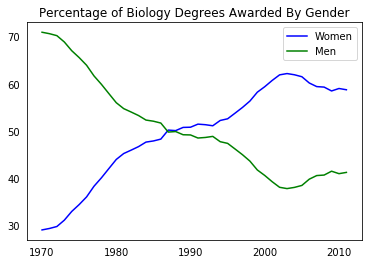

In [6]:
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue", label = "Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green", label = "Men")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc = "upper right")
ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the [matplotlib.spines.Spine](http://matplotlib.org/api/spines_api.html) class. When we create an Axes instance, four Spine objects are created for us.

In [7]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7f3f633c7898>),
             ('right', <matplotlib.spines.Spine at 0x7f3f633c7be0>),
             ('bottom', <matplotlib.spines.Spine at 0x7f3f633c7f98>),
             ('top', <matplotlib.spines.Spine at 0x7f3f633c70b8>)])

To hide all of the spines, we need to:

* access each Spine object in the dictionary
* call the [`Spine.set_visible()`](https://matplotlib.org/gallery/ticks_and_spines/spines_bounds.html?highlight=spine%20set_visible) method
* pass in the Boolean value `False`

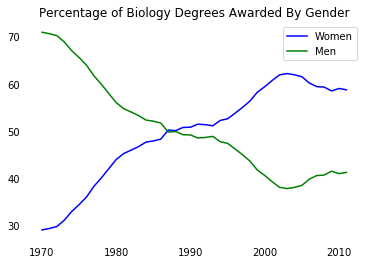

In [19]:
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue", label = "Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green", label = "Men")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.legend(loc = "upper right")
ax.tick_params(bottom=False, top=False, left=False, right=False)

[ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]

plt.show()

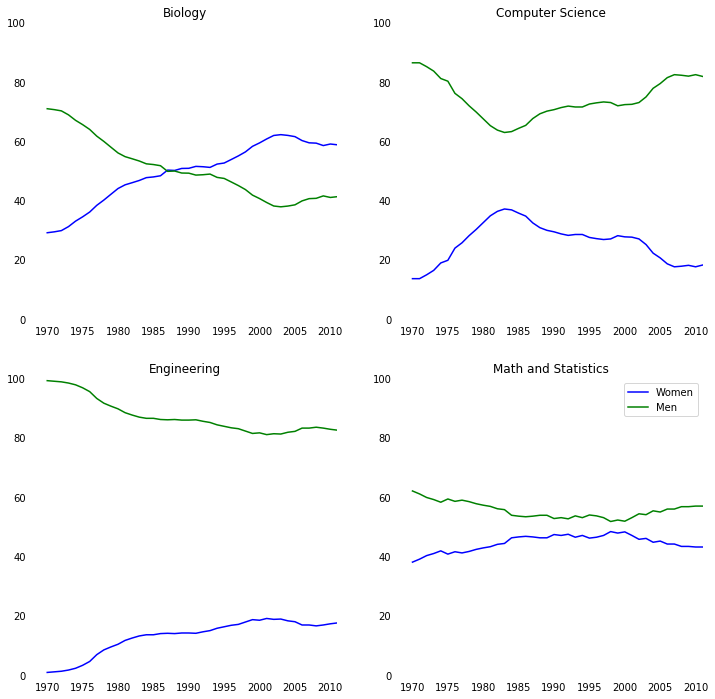

In [20]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for position in range(0,4):
    ax = fig.add_subplot(2,2,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[position]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[position]], c='green', label='Men')
    ax.set_title(major_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

The [Color Blind 10](https://public.tableau.com/profile/chris.gerrard#!/vizhome/TableauColors/ColorPaletteswithRGBValues) palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (`.`):

<img src="https://s3.amazonaws.com/dq-content/tableau_rgb_values.png" alt="ColorBlind10" width="600"/>

These numbers represent the RGB values for each color. The [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color. The RGB color model is very familiar to people who work in photography, filmography, graphic design, and any field that use colors extensively. In computers, each RGB value can range between 0 and 255. This is because 256 integer values can be represented using 8 bits. You can read more about 8-bit color [here](https://en.wikipedia.org/wiki/8-bit_color).

To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).

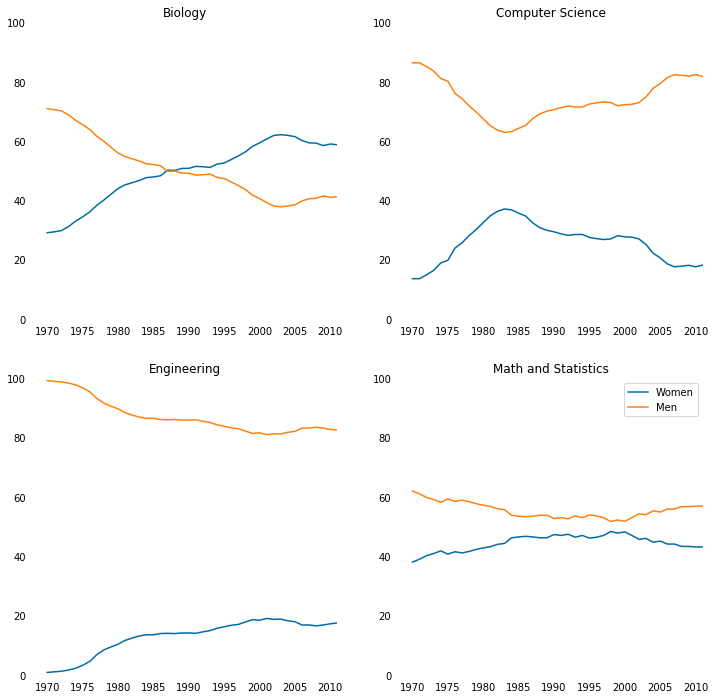

In [21]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,4):
    ax = fig.add_subplot(2,2,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[position]], c = cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[position]], c = cb_orange, label='Men')
    ax.set_title(major_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend(loc='upper right')
plt.show()

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the `Axes.plot()` method, we can use the `linewidth` parameter to specify the line width. Matplotlib expects a float value for this parameter.

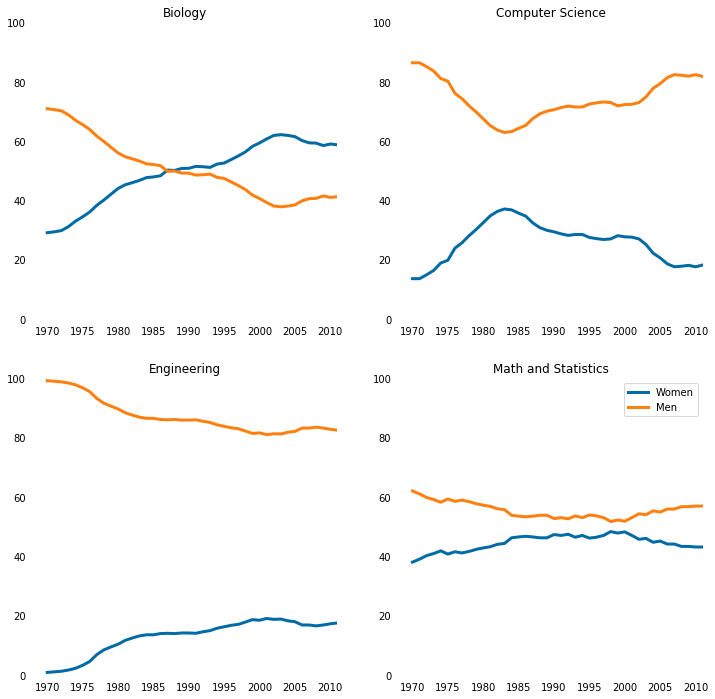

In [22]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,4):
    ax = fig.add_subplot(2,2,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[position]], 
            c = cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[position]], 
            c = cb_orange, label='Men', linewidth = 3)
    ax.set_title(major_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend(loc='upper right')
plt.show()

Now, let's visualize all six STEM degrees. To make the viewing experience more coherent, we can:

* use layout of a single row with multiple columns
* order the plots in decreasing order of initial gender gap

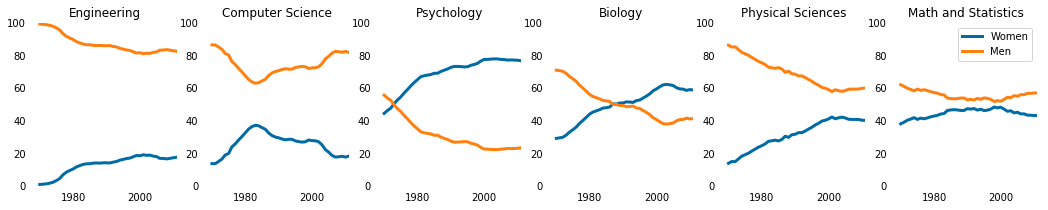

In [23]:
stem_cats = ['Engineering', 'Computer Science', 
             'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,6):
    ax = fig.add_subplot(1,6,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[position]], 
            c = cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[position]], 
            c = cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend(loc='upper right')
plt.show()

The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders.

To add text annotations to a matplotlib plot, we use the [`Axes.text()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.text) method. This method has a few required parameters:

* `x`: x-axis coordinate (as a float)
* `y`: y-axis coordinate (as a float)
* `s`: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. 

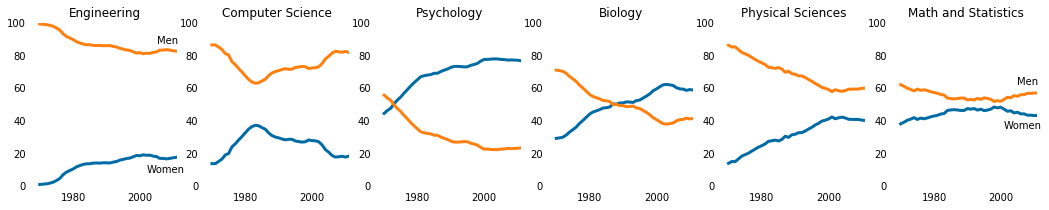

In [24]:
stem_cats = ['Engineering', 'Computer Science', 
             'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

for position in range(0,6):
    ax = fig.add_subplot(1,6,position + 1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[position]], 
            c = cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[position]], 
            c = cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[position])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    [ax.spines[spine].set_visible(False) for spine in ax.spines.keys()]
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    if position == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif position == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")

plt.show()

Now it looks way much better!